#Лабораторна робота №5
#Метод ліктя. Кластеризація даних.
#Завдання 1. Робота з датасетом load_iris.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Завантаження датасету.
iris = load_iris()
x = iris.data
pd.DataFrame(x, columns = iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


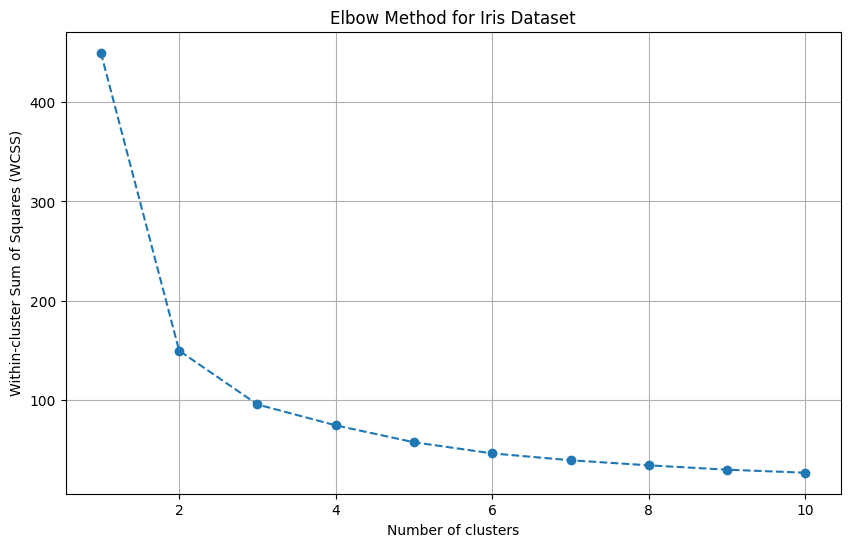

In [ ]:
#Масштабування даних.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#Вибір даних для кластеризації.
X_2d = pd.DataFrame(X_scaled, columns = iris.feature_names).iloc[:, 1:]

#Застосування ліктевого методу для визначення оптимальної кількості кластерів.
wcss_2d = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X_2d)
  wcss_2d.append(kmeans.inertia_)

#Візуалізація графіка ліктевого методу.
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss_2d, marker = 'o', linestyle = '--')
plt.title('Elbow Method for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

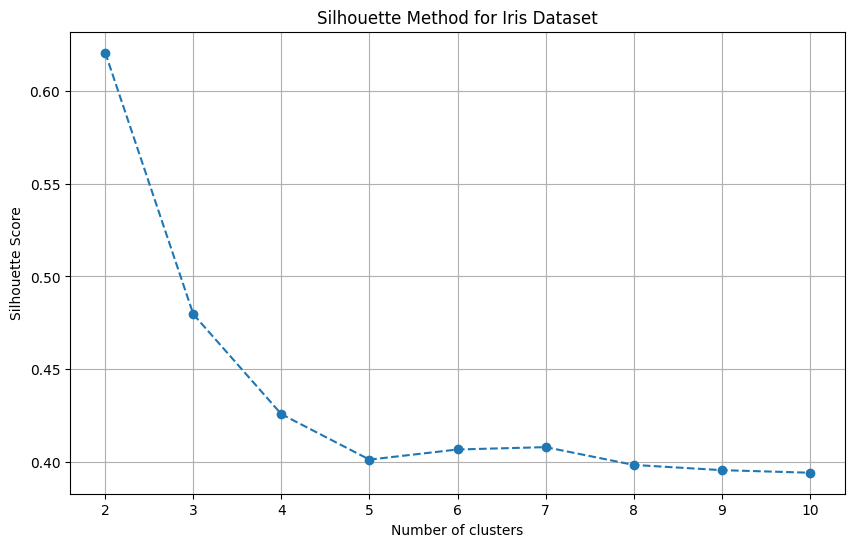

In [ ]:
#Застосування методу силуетів для визначення оптимальної кількості кластерів.
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  cluster_labels = kmeans.fit_predict(X_2d)
  silhouette_avg = silhouette_score(X_2d, cluster_labels)
  silhouette_scores.append(silhouette_avg)

#Візуалізація графіка методу силуетів.
plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker = 'o', linestyle = '--')
plt.title('Silhouette Method for Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

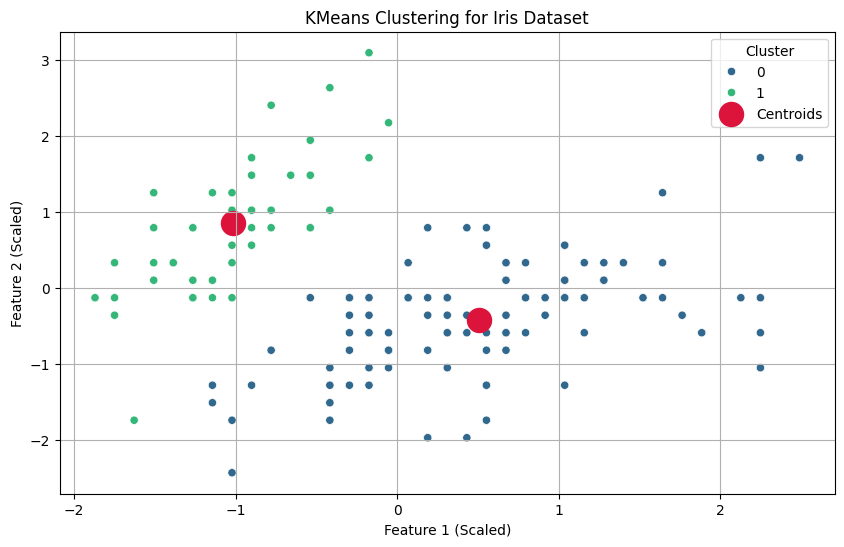

In [ ]:
import seaborn as sns
#Використання KMeans для кластеризації.
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

#Візуалізація кластерів.
plt.figure(figsize = (10, 6))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = clusters, palette = 'viridis', legend = 'full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'crimson', label = 'Centroids')
plt.title('KMeans Clustering for Iris Dataset')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title = 'Cluster')
plt.grid(True)
plt.show()

Висновок: В данній роботі було виконано кластеризацію даних із датасету Iris за допомогою ліктьового та силуетного методів, також проведено візуалізацію кластерів. Однак обидва методи показали, що оптимальна кількість кластерів дорівнює трьом, що відповідає природній структурі даних цього датасету.

#Завдання 2. Робта з датасетом Student_data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Виведення перших рядків датасету.
file_path = '/content/drive/My Drive/Student_data(in).csv'
df = pd.read_csv(file_path)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
#Виведення назв стовпців.
print("Назви стовпців:")
df.columns

Назви стовпців:


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
#Перевірка наявності пропущених значень.
print("Перевірка наявності пропущених значень:")
df.isnull().sum()

Перевірка наявності пропущених значень:


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
#Перевірка наявності дубдікатів.
print("Перевірка наявності дубдікатів:")
df.duplicated().sum()

Перевірка наявності дубдікатів:


0

In [ ]:
#Описова статистика.
print("Описова статистика:")
df.describe()

Описова статистика:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
#Вибір ознак (Х) та цільової змінної У.
X = df.drop('GradeClass', axis = 1)
y = df['GradeClass']

#Поділ даних на навчальну та тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Масштабування ознак.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#1. Random Forest.
#Параметри для пошуку.
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state = 42)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)

#Найкращі параметри й точність.
print("The best parametres for Random Forest:", grid_search_rf.best_params_)
print("The best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

#Оцінка на тестовій вибірці.
y_pred_rf = grid_search_rf.predict(X_test)
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
#2. Linear Regression.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#Масштабування (нормалізація) даних вручну.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Параметри для пошуку.
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

lr = LinearRegression()

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_scaled, y_train)

#Найкращі параметри й точність.
print("Best parameters for Linear Regression:", grid_search_lr.best_params_)
print("Best cross-validation score for Linear Regression:", grid_search_lr.best_score_)

#Оцінка на тестовій вибірці.
y_pred_lr = grid_search_lr.predict(X_test_scaled)
print("Test RMSE for Linear Regression:", mean_squared_error(y_test, y_pred_lr, squared=False))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}
Best cross-validation score for Linear Regression: 0.6125426808478212
Test RMSE for Linear Regression: 0.7283622487830835


In [ ]:
#3. Decision Tree.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#Параметри для пошуку.
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state = 42)

grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv = 5, n_jobs = -1, verbose = 2)
grid_search_dt.fit(X_train, y_train)

#Найкращі параметри й точність.
print("The best parameters for Decision Tree:", grid_search_dt.best_params_)
print("The best cross-validation accuracy for Decision Tree:", grid_search_dt.best_score_)

#Оцінка на тестовій вибірці.
y_pred_dt = grid_search_dt.predict(X_test)
print("Test accuracy for Decision Tree:", accuracy_score(y_test, y_pred_dt))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
The best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
The best cross-validation accuracy for Decision Tree: 0.9351728568889861
Test accuracy for Decision Tree: 0.9248434237995825


In [ ]:
#Порівняння результатів.
#Виведення точності на тестовій вибірці для кожної моделі.
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Test accuracy for Linear Regression:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Test accuracy for Decision Tree:", accuracy_score(y_test, y_pred_dt))

#Виведення звіту про класифікацію для найкращої моделі.
print("Classification report for the best model:")
print(classification_report(y_test, y_pred_dt))

Test accuracy for Random Forest: 0.9123173277661796
Test accuracy for Linear Regression: 0.7283622487830835
Test accuracy for Decision Tree: 0.9248434237995825
Classification report for the best model:
              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73        22
         1.0       0.81      0.94      0.87        49
         2.0       0.95      0.88      0.91        85
         3.0       0.89      0.91      0.90        86
         4.0       0.97      0.97      0.97       237

    accuracy                           0.92       479
   macro avg       0.88      0.88      0.88       479
weighted avg       0.93      0.92      0.92       479



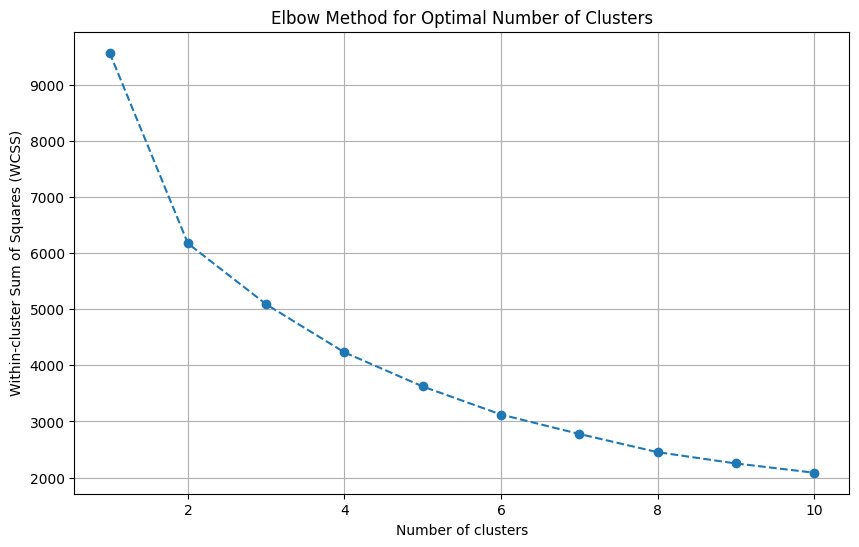

In [ ]:
#Вибір числових стовпців для кластеризації.
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

#Масштабування даних.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

#Застосування ліктевого методу для визначення оптимальної кількості кластерів.
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

#Візуалізація графіка ліктевого методу.
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

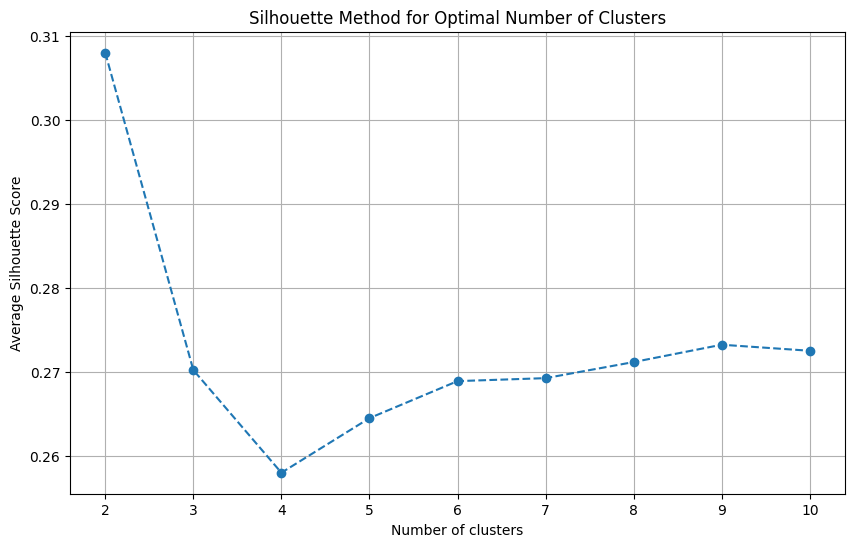

In [ ]:
#Застосування методу силуетів для визначення оптимальної кількості кластерів.
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  cluster_labels = kmeans.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)

#Візуалізація графіка методу силуетів.
plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker = 'o', linestyle = '--')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

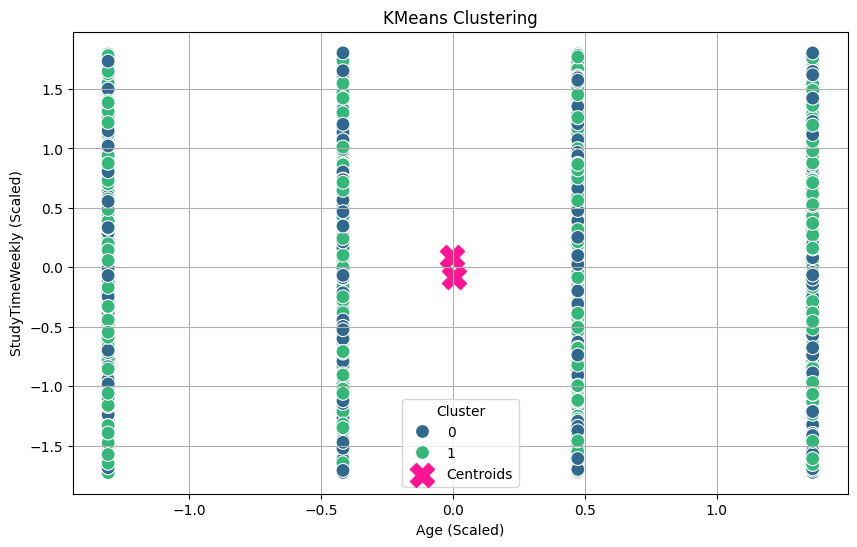

In [ ]:
#Візуалізація кластерів.
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

#Візуалізація кластерів за допомогою двох перших ознак.
plt.figure(figsize = (10, 6))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = clusters, palette = 'viridis', legend = 'full', s = 100)

#Додавання центроїдів кластерів.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'deeppink', label = 'Centroids', marker = 'X')

#Візуалізація графіка.
plt.title('KMeans Clustering')
plt.xlabel('Age (Scaled)')
plt.ylabel('StudyTimeWeekly (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Висновок: В даному завданні було проведено попередній аналіз датасету Student_data. Для прогнозування оцінок були побудовані три моделі:
1. Random Forest
2. Linear Regression
3. Decision Tree.

Результати показали, що найвищу точність продемонструвала модель Decision Tree.
Крім того, як в першому завданні, для кластеризації даних були застосовані силуетний метод та метод ліктя, які вказали, що оптимальною є кількість у два кластери, що також було візуалізовано.